# Market Segmentation Example

##### Imports

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

##### Load data

In [17]:
data = pd.read_csv('../data/3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


* Satisfaction: Self-reported scale 1-10
* Loyalty: Several factors, like purchases for 1 year etc.

##### Plotting

Text(0, 0.5, 'Loyalty')

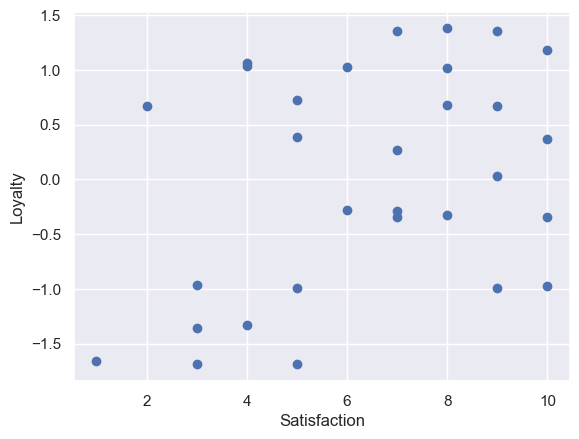

In [18]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

##### Selecting features

In [19]:
# We select both/all columns
x = data.copy()

##### Clustering

In [20]:
kmeans = KMeans(2)
kmeans.fit(x)

c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [21]:
clusters = x.copy()
clusters['cluster_prediction'] = kmeans.fit_predict(x)

c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
clusters

,Satisfaction,Loyalty,cluster_prediction
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

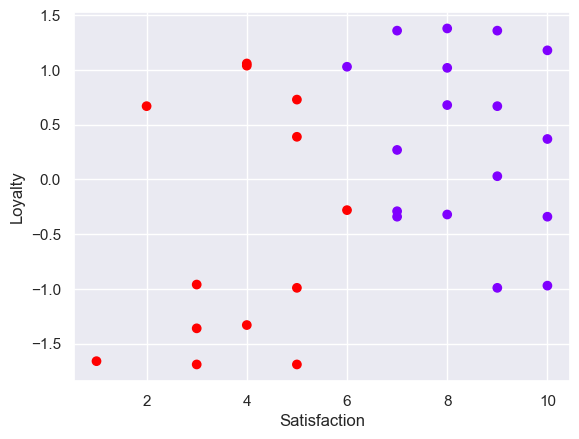

In [23]:
plt.scatter(clusters['Satisfaction'],
            clusters['Loyalty'],
            c = clusters['cluster_prediction'],
            cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

* Looks like satisfaction has bigger weight in determining clusters than Loyalty since loyalty is standardized and hence smaller values.
* Solution: Let's also standardize Satisfaction


##### Standardizing

In [24]:
from sklearn import preprocessing

In [25]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Let's determine num of clusters using the Elbow Method

##### WCSS

In [26]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[60.0,
 29.818973034723147,
 18.058485014940025,
 10.24718180592842,
 7.792695153937188,
 6.569489487091783,
 5.422667241438837,
 4.315662464700005,
 3.804128903766371]

##### Plotting the Elbow

Text(0, 0.5, 'WCSS')

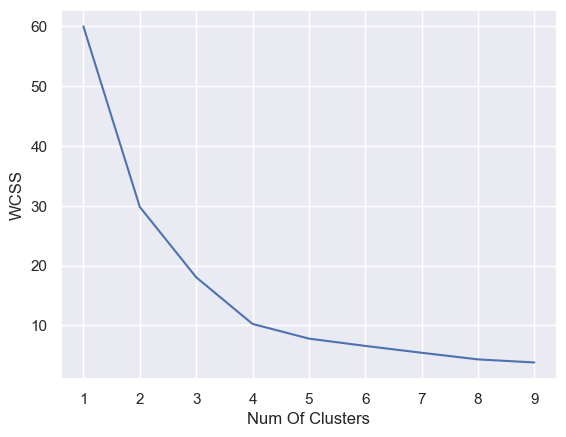

In [27]:
plt.plot(range(1,10), wcss)
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')

* Looks like best number of clusters is between 3-5
* Let's try each

## Plotting the 3,4 and 5 clusters

In [28]:
kmeans_3 = KMeans(3)
kmeans_4 = KMeans(4)
kmeans_5 = KMeans(5)

kmeans_3.fit(x_scaled)
kmeans_4.fit(x_scaled)
kmeans_5.fit(x_scaled)

c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [29]:
# All 3 dataframes have the original values but predictions are based on standardized data
clusters_3 = x.copy()
clusters_4 = x.copy()
clusters_5 = x.copy()

clusters_3['cluster_predictions'] = kmeans_3.fit_predict(x_scaled)
clusters_4['cluster_predictions'] = kmeans_4.fit_predict(x_scaled)
clusters_5['cluster_predictions'] = kmeans_5.fit_predict(x_scaled)


c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### 3 Clusters

Text(0, 0.5, 'Loyalty')

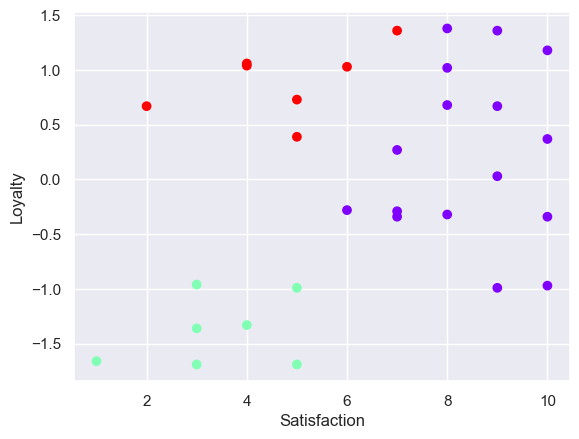

In [31]:
plt.scatter(clusters_3['Satisfaction'],
            clusters_3['Loyalty'],
            c = clusters_3['cluster_predictions'],
            cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### 4 Clusters

Text(0, 0.5, 'Loyalty')

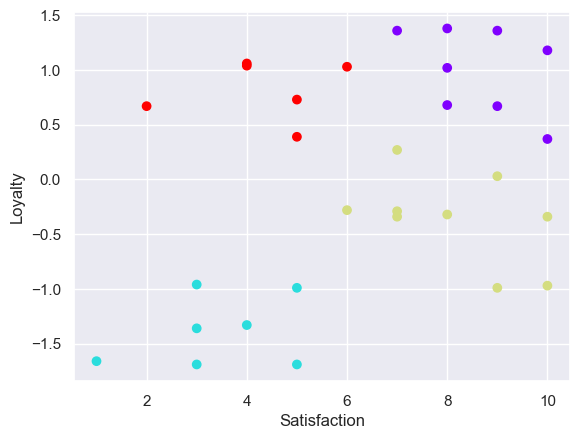

In [32]:
plt.scatter(clusters_4['Satisfaction'],
            clusters_4['Loyalty'],
            c = clusters_4['cluster_predictions'],
            cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### 5 Clusters

Text(0, 0.5, 'Loyalty')

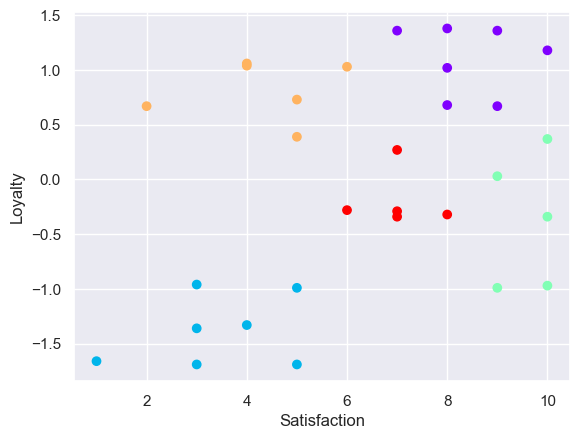

In [33]:
plt.scatter(clusters_5['Satisfaction'],
            clusters_5['Loyalty'],
            c = clusters_5['cluster_predictions'],
            cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

* We could characterize our clusters like this for example:

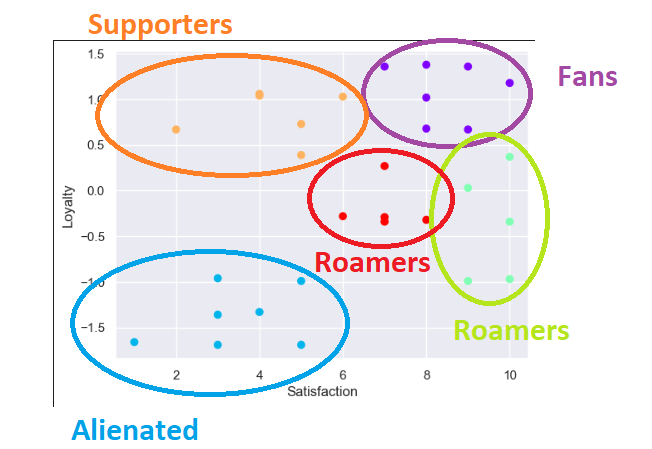

# That's it!

* Could use this information to for example target the roamers or supporters with some campaign to try increase their satisfaction/loyalty.
* And perhaps see if there is a reason why some people are not satisfied and target them somehow